In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
print("Libraries imported!")

Libraries imported!


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('Training_Data_16k.csv')
print("Data loaded!")

Data loaded!


In [4]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

continuouos_features = ['Elevation_30m.tif', 'Slope_30m.tif', 'Curvature_30m.tif', 'Dis2stream_30m.tif', 'Dis2Roads_30m.tif',
                        'Rainfall_30m.tif', 'Stream_Density_30m.tif', 'SPI_30m.tif','TWI_30m.tif'
]

categorical_features = ['LULC_30m.tif', 'Geomorphology_30m.tif', 'Lithology_30m.tif', 'Soil_30m.tif'
]

circular_feature = 'Aspect_30m.tif'

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

print("\nClass distribution:")
print(y.value_counts()) #counts how many 0 and 1 classes
print("\nClass proportions:")
print(y.value_counts(normalize=True)) #gives a % of 0 and 1 classes

Dataset Shape: (16000, 15)

First few rows:
   class  Aspect_30m.tif  Curvature_30m.tif  Dis2Roads_30m.tif  \
0      0       59.036243          -0.111111         247.386337   
1      0      315.000000           0.000000        1290.000000   
2      1      116.565048          -0.222222        7122.836426   
3      1       45.000000           0.444444        1018.675598   
4      1      123.690071          -0.555556        2621.011230   

   Dis2stream_30m.tif  Elevation_30m.tif  Geomorphology_30m.tif  \
0          510.881592                 43                      1   
1          918.313660                 45                      2   
2         2002.598267                 37                      3   
3          210.000000                 39                      2   
4          954.829834                 38                      1   

   Lithology_30m.tif  LULC_30m.tif  Rainfall_30m.tif  Slope_30m.tif  \
0                  2             5       1180.459351       7.307570   
1             

In [5]:
# Replace special values with NaN
X_clean = X.replace([-128, -1, 'NA', 65535], np.nan)
X_clean = X_clean.apply(pd.to_numeric, errors='coerce')

print("\nMissing values after cleaning:")
print(X_clean.isnull().sum())

# Remove rows with missing values
mask = ~X_clean.isnull().any(axis=1)
X_clean = X_clean[mask]
y_clean = y[mask]

print(f"\nRows after removing missing values: {len(X_clean)}")
print(f"Rows removed: {len(df) - len(X_clean)}")



Missing values after cleaning:
Aspect_30m.tif            759
Curvature_30m.tif          63
Dis2Roads_30m.tif          12
Dis2stream_30m.tif         12
Elevation_30m.tif           8
Geomorphology_30m.tif       0
Lithology_30m.tif           0
LULC_30m.tif                0
Rainfall_30m.tif            9
Slope_30m.tif             166
Soil_30m.tif              196
SPI_30m.tif                78
Stream_Density_30m.tif     12
TWI_30m.tif               166
dtype: int64

Rows after removing missing values: 14930
Rows removed: 1070


In [6]:
#display of categorical features
for cat_feat in categorical_features:
    print(f"\n{cat_feat}:")
    print(X_clean[cat_feat].value_counts().sort_index())
    print(f"Number of unique categories: {X_clean[cat_feat].nunique()}")



LULC_30m.tif:
LULC_30m.tif
1      634
2      256
3        8
4       48
5    11654
6      396
7     1692
8      242
Name: count, dtype: int64
Number of unique categories: 8

Geomorphology_30m.tif:
Geomorphology_30m.tif
1    9530
2    2626
3    2323
4      40
5      11
6     400
Name: count, dtype: int64
Number of unique categories: 6

Lithology_30m.tif:
Lithology_30m.tif
1    11838
2      212
3      243
4     2610
5       27
Name: count, dtype: int64
Number of unique categories: 5

Soil_30m.tif:
Soil_30m.tif
3682.0    2677
3695.0    3935
3743.0    1989
3808.0    6329
Name: count, dtype: int64
Number of unique categories: 4


In [7]:
#continuous features 
X_continuous = X_clean[continuouos_features].copy() #copy in order not to mess up original

scaler_standard = StandardScaler()  #z-score scaling z=(x-mean)/std, mean = 0 and standard deviation = 1
X_continuous_scaled = pd.DataFrame(
    scaler_standard.fit_transform(X_continuous),  #finds mean and std of a column and scale it 
    columns=continuouos_features,
    index=X_clean.index
)

print("Continuouos features normalized (Z-score)")
print("Mean:", X_continuous_scaled.mean().round(6).values[:3], "...") #mean, rounded on 6 dec. points, shows 3 results
                                                                      #numbers should be ~0      
print("Std:", X_continuous_scaled.std().round(6).values[:3], "...")  #standard deviation -> numbers should be ~1


Continuouos features normalized (Z-score)
Mean: [-0.  0. -0.] ...
Std: [1.000033 1.000033 1.000033] ...


In [8]:
#categorical data
X_categorical = X_clean[categorical_features].copy()

for col in categorical_features:
    X_categorical[col] = X_categorical[col].astype(str)

X_categorical_encoded = pd.get_dummies(
    X_categorical, 
    columns=categorical_features,
    drop_first=True,  #"dummy variable trap"
    prefix=categorical_features
)
#it separates types in each column into unique columns, so that column does not have values 1-6, but 0/1
#example soil has types 1,2,3. New columns: Soil_1, Soil_2, Soil_3 and each will have values 0/1 for each row

print(f"Number of columns before encoding: {len(categorical_features)}")
print(f"Number of columns after encoding: {X_categorical_encoded.shape[1]}")
print("\nNew columns(first 10):")
print(X_categorical_encoded.columns.tolist()[:10])

Number of columns before encoding: 4
Number of columns after encoding: 19

New columns(first 10):
['LULC_30m.tif_2', 'LULC_30m.tif_3', 'LULC_30m.tif_4', 'LULC_30m.tif_5', 'LULC_30m.tif_6', 'LULC_30m.tif_7', 'LULC_30m.tif_8', 'Geomorphology_30m.tif_2', 'Geomorphology_30m.tif_3', 'Geomorphology_30m.tif_4']


In [9]:
#circular data - left in degrees
aspect_values = X_clean[circular_feature].copy()

# Sin/Cos transformation (without conversion)
X_circular = pd.DataFrame({
    'Aspect_sin': np.sin(aspect_values),
    'Aspect_cos': np.cos(aspect_values)
}, index=X_clean.index)


In [10]:
#connecting all the processed features
X_processed = pd.concat([
    X_continuous_scaled,      # Normalized continuous
    X_categorical_encoded,    # One-hot encoded categorical
    X_circular               # Sin/Cos transformed aspect
], axis=1)

print(f"\nFINAL dataset shape: {X_processed.shape}")
print(f"Sum of features: {X_processed.shape[1]}")
print(f"  - Continuous: {len(continuouos_features)}")
print(f"  - Categorical (encoded): {X_categorical_encoded.shape[1]}")
print(f"  - Circular: 2 (sin + cos)")


FINAL dataset shape: (14930, 30)
Sum of features: 30
  - Continuous: 9
  - Categorical (encoded): 19
  - Circular: 2 (sin + cos)


In [11]:
#save all data and separate features
X_processed.to_csv('data_processed_proper.csv', index=False)
y_clean.to_csv('target_clean.csv', index=False)

X_continuous_scaled.to_csv('data_continuous_normalized.csv', index=False)
X_categorical_encoded.to_csv('data_categorical_encoded.csv', index=False)
X_circular.to_csv('data_circular_transformed.csv', index=False)

print(f"\nNaN values in final dataset: {X_processed.isnull().sum().sum()}")


NaN values in final dataset: 0



Saved: continuous_features_normalization.png
Saved: categorical_features_distribution.png
Saved: aspect_circular_transformation.png


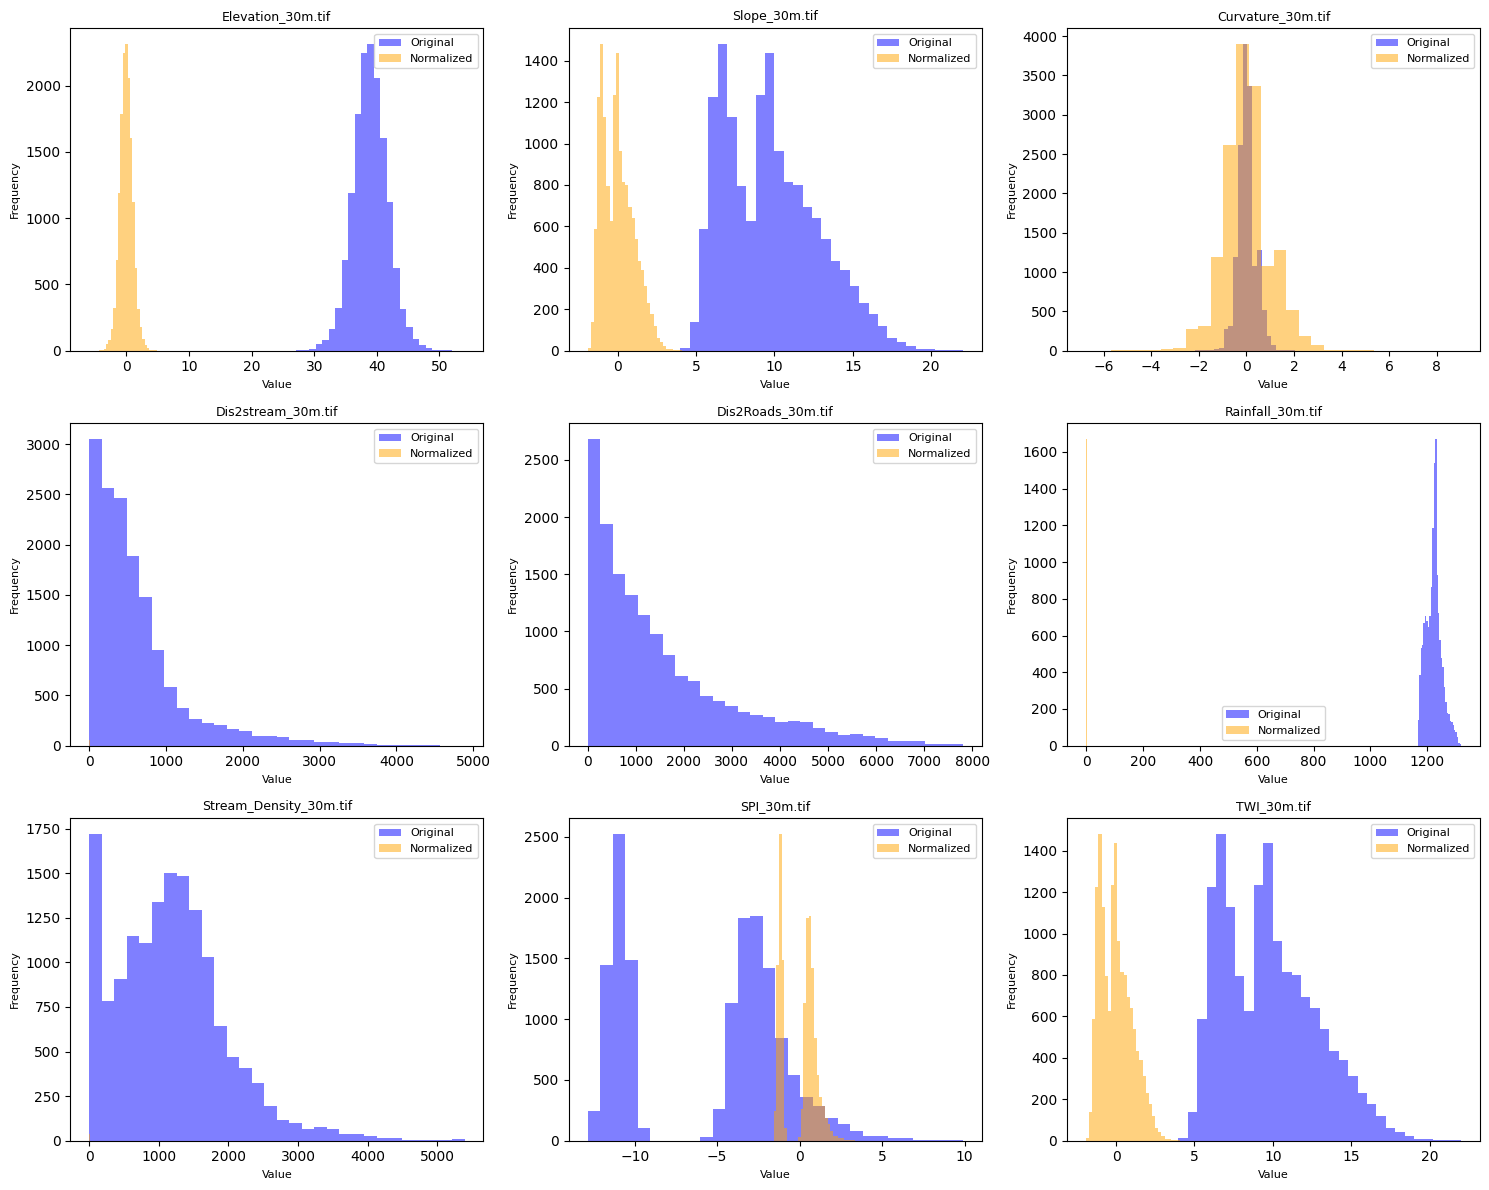

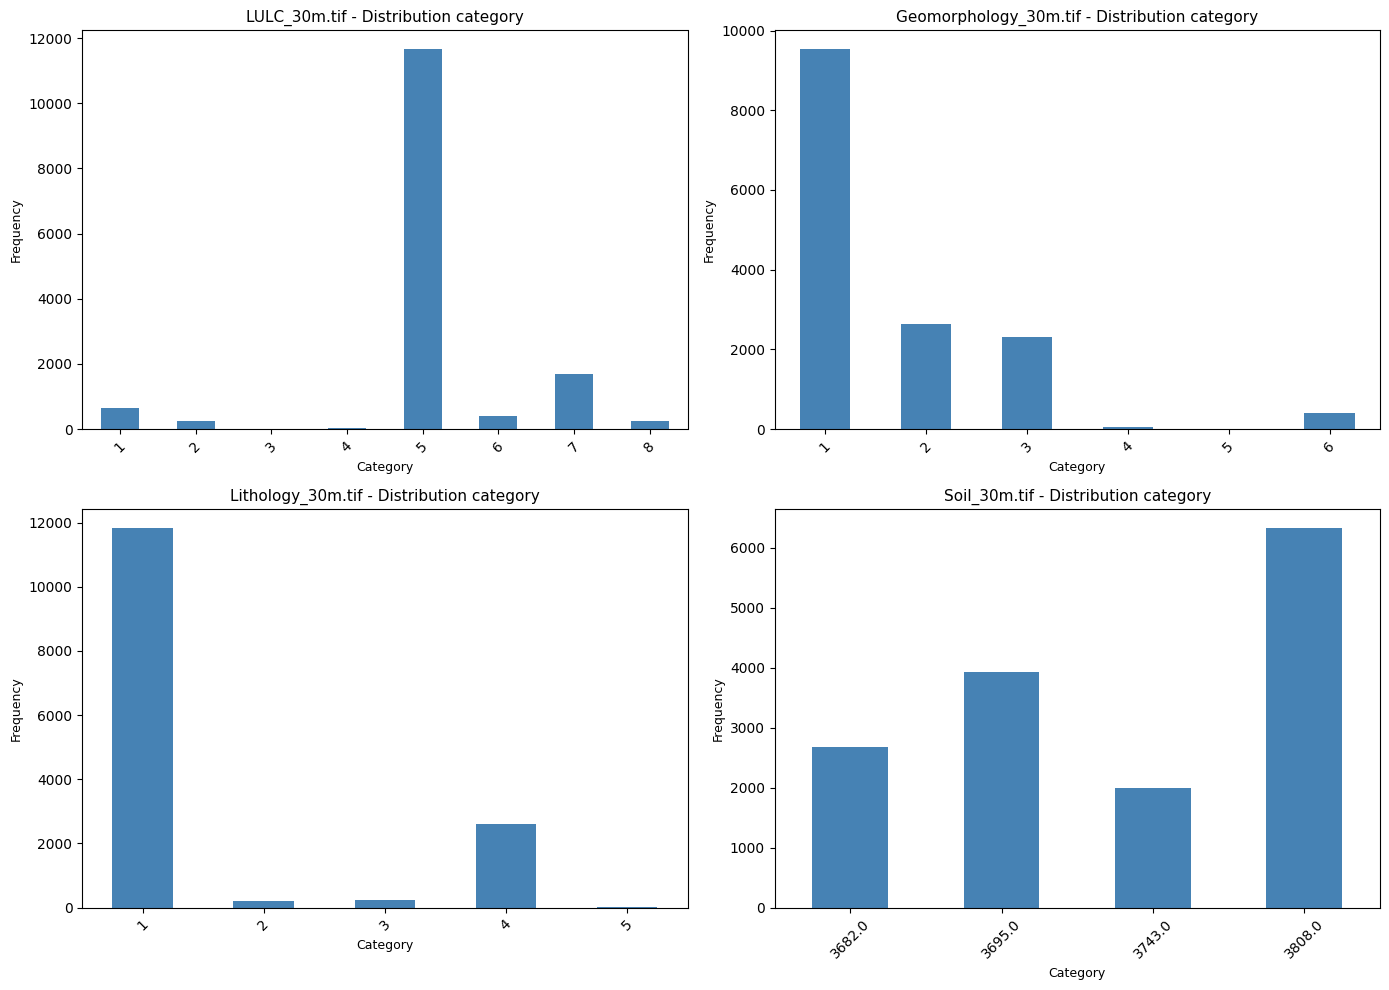

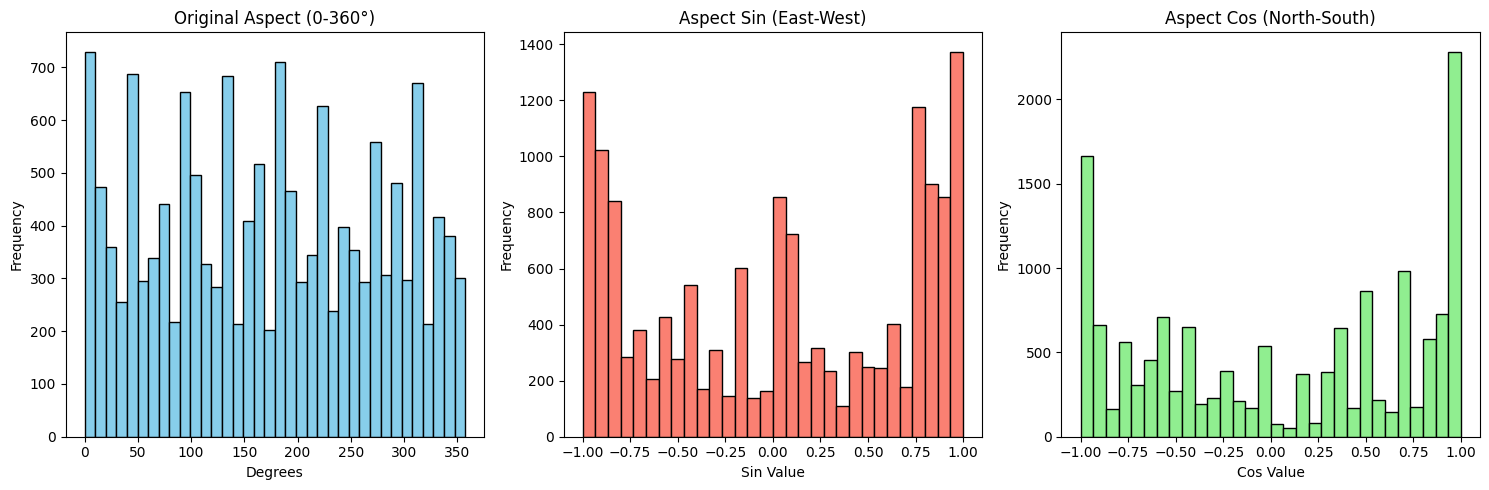

In [12]:
# VISUAL 
#Continuous features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx, feature in enumerate(continuouos_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.hist(X_continuous[feature], bins=30, alpha=0.5, label='Original', color='blue')
    ax.hist(X_continuous_scaled[feature], bins=30, alpha=0.5, label='Normalized', color='orange')
    ax.set_title(f'{feature}', fontsize=9)
    ax.legend(fontsize=8)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.savefig('continuous_features_normalization.png', dpi=300, bbox_inches='tight')
print("\nSaved: continuous_features_normalization.png")

# Categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    value_counts = X_clean[feature].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{feature} - Distribution category', fontsize=11)
    ax.set_xlabel('Category', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_features_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: categorical_features_distribution.png")

# Circular features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original aspect
axes[0].hist(aspect_values, bins=36, color='skyblue', edgecolor='black')
axes[0].set_title('Original Aspect (0-360°)')
axes[0].set_xlabel('Degrees')
axes[0].set_ylabel('Frequency')

# Aspect Sin
axes[1].hist(X_circular['Aspect_sin'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Aspect Sin (East-West)')
axes[1].set_xlabel('Sin Value')
axes[1].set_ylabel('Frequency')

# Aspect Cos
axes[2].hist(X_circular['Aspect_cos'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Aspect Cos (North-South)')
axes[2].set_xlabel('Cos Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('aspect_circular_transformation.png', dpi=300, bbox_inches='tight')
print("Saved: aspect_circular_transformation.png")

In [13]:
#CORRELATION ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_processed = pd.read_csv('data_processed_proper.csv')
y_clean = pd.read_csv('target_clean.csv')
X_continuous = pd.read_csv('data_continuous_normalized.csv')
X_categorical = pd.read_csv('data_categorical_encoded.csv')
X_circular = pd.read_csv('data_circular_transformed.csv')

print(f"\nDataset shape: {X_processed.shape}")
print(f"Target shape: {y_clean.shape}")


Dataset shape: (14930, 30)
Target shape: (14930, 1)


Slope_30m.tif <-> TWI_30m.tif: 1.000


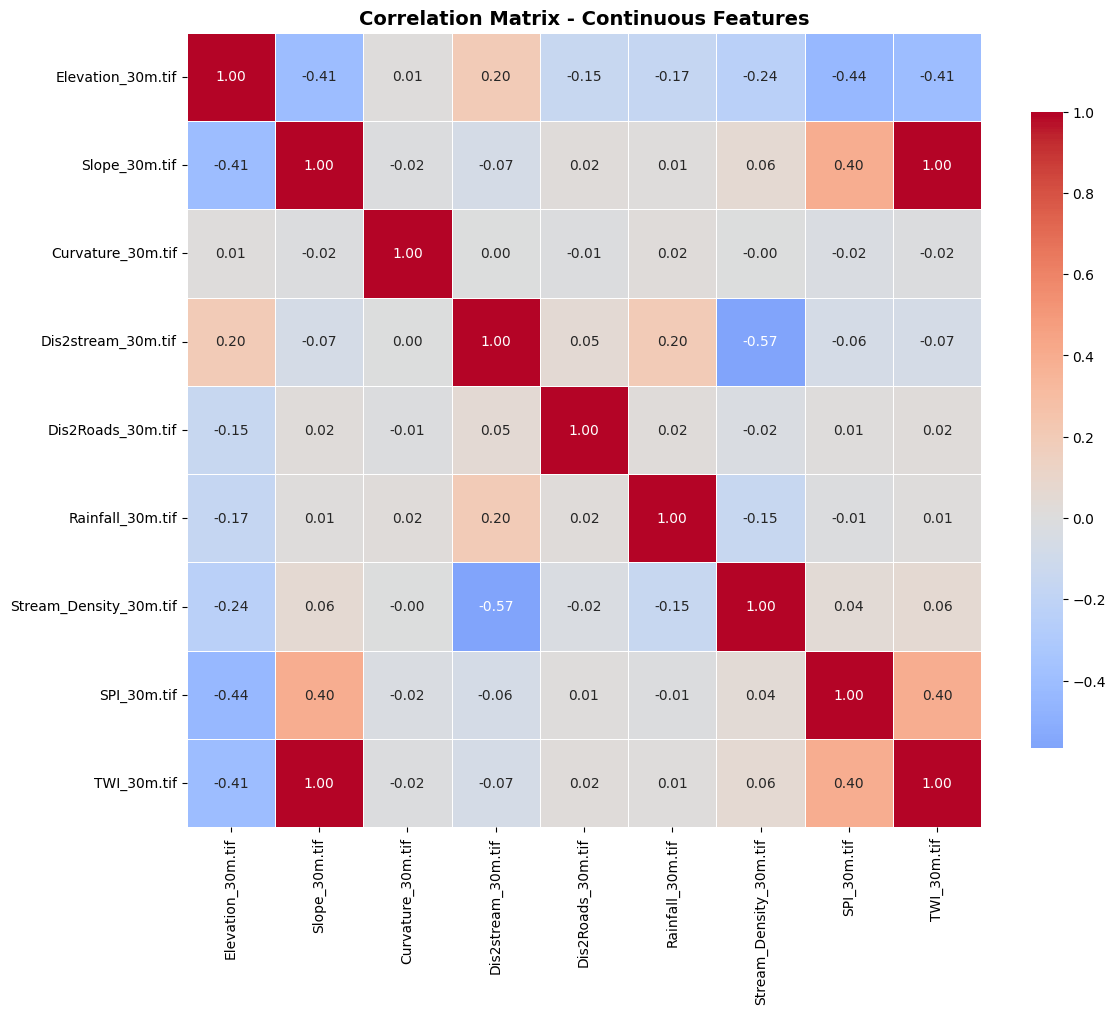

In [14]:
#PEARSON CORRELATION - Continuous Features
corr_matrix_continuous = X_continuous.corr()

high_corr_pairs = []
for i in range(len(corr_matrix_continuous.columns)):
    for j in range(i+1, len(corr_matrix_continuous.columns)):
        corr_value = corr_matrix_continuous.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = corr_matrix_continuous.columns[i]
            feature2 = corr_matrix_continuous.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))
            print(f"{feature1} <-> {feature2}: {corr_value:.3f}")

if len(high_corr_pairs) == 0:
    print("No highly correlated pairs found (threshold: 0.7)")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_continuous, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Continuous Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_continuous_features.png', dpi=300, bbox_inches='tight')



✓ Saved: correlation_with_target_top20.png


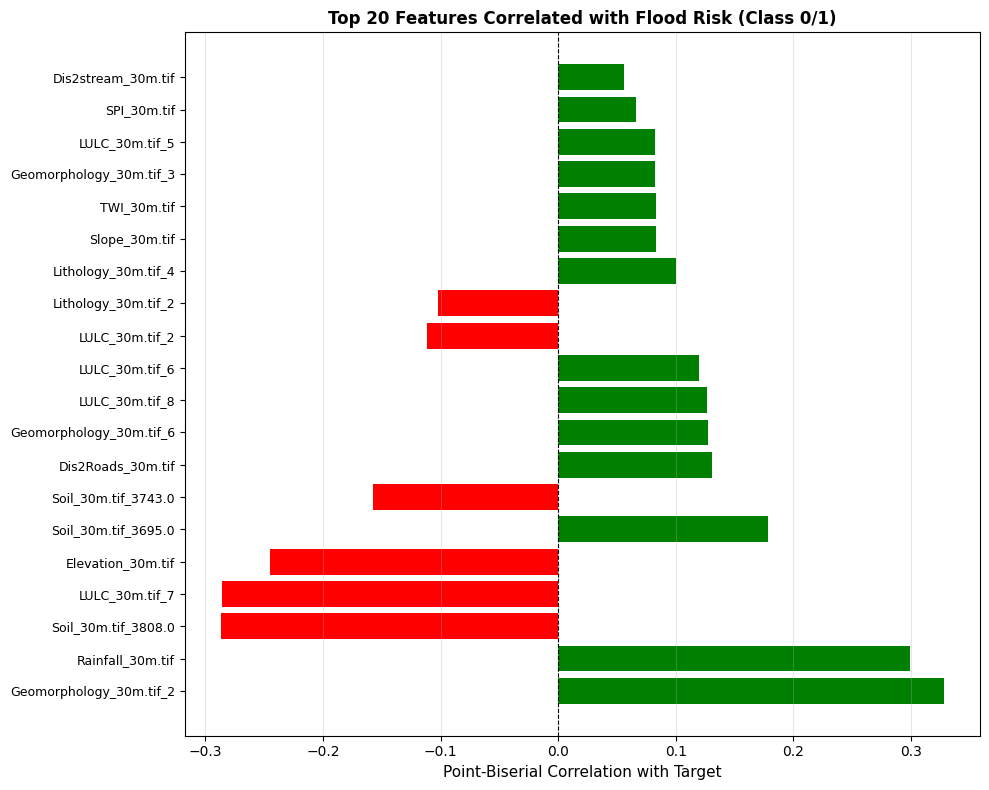

In [15]:
#POINT-BISERIAL CORRELATION - Features vs Target (Class 0/1)

target = y_clean.values.ravel()

correlationz_with_target={}

for col in X_processed.columns:
    feature_values = X_processed[col].values
    corr, p_value = pointbiserialr(target, feature_values)
    correlationz_with_target[col] = {'correlation' : corr, 'p_value' : p_value}

    #convert to datagrame and sort

    corr_target_df = pd.DataFrame(correlationz_with_target).T
    corr_target_df = corr_target_df.sort_values('correlation', key=abs, ascending=False)

# Visualize top 20 correlations with target
top_20_features = corr_target_df.head(20)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in top_20_features['correlation']]
plt.barh(range(len(top_20_features)), top_20_features['correlation'], color=colors)
plt.yticks(range(len(top_20_features)), top_20_features.index, fontsize=9)
plt.xlabel('Point-Biserial Correlation with Target', fontsize=11)
plt.title('Top 20 Features Correlated with Flood Risk (Class 0/1)', 
          fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_with_target_top20.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: correlation_with_target_top20.png")

In [ ]:
#CHI-SQUARE TEST - Categorical features vs target
# For original categorical features (before encoding)
X_original = pd.read_csv('Training_Data_16k.csv')
X_original_clean = X_original.replace([-128, -1, 'NA', 65535], np.nan)
mask = ~X_original_clean.isnull().any(axis=1)
X_original_clean = X_original_clean[mask]

categorical_original = ['LULC_30m.tif', 'Geomorphology_30m.tif', 
                       'Lithology_30m.tif', 'Soil_30m.tif']

chi_square_results = {}

for cat_feat in categorical_original:
    # Create contingency table
    contingency_table = pd.crosstab(X_original_clean[cat_feat], target)
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V (effect size)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    chi_square_results[cat_feat] = {
        'chi2': chi2,
        'p_value': p_value,
        'cramers_v': cramers_v,
        'significant': p_value < 0.05
    }
    
    print(f"\n{cat_feat}:")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Cramér's V: {cramers_v:.4f}")
    print(f"  Significant: {'Yes ✓' if p_value < 0.05 else 'No ✗'}")

# Visualize Cramér's V
cramers_v_df = pd.DataFrame(chi_square_results).T
cramers_v_df = cramers_v_df.sort_values('cramers_v', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(cramers_v_df.index, cramers_v_df['cramers_v'], 
        color=['green' if x else 'red' for x in cramers_v_df['significant']])
plt.xlabel('Categorical Features', fontsize=11)
plt.ylabel("Cramér's V (Effect Size)", fontsize=11)
plt.title("Association between Categorical Features and Flood Risk", 
          fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0.1, color='orange', linestyle='--', label='Weak effect (0.1)')
plt.axhline(y=0.3, color='blue', linestyle='--', label='Medium effect (0.3)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('chi_square_categorical_target.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: chi_square_categorical_target.png")

NameError: name 'target' is not defined


✓ Saved: correlation_heatmap_all_features.png


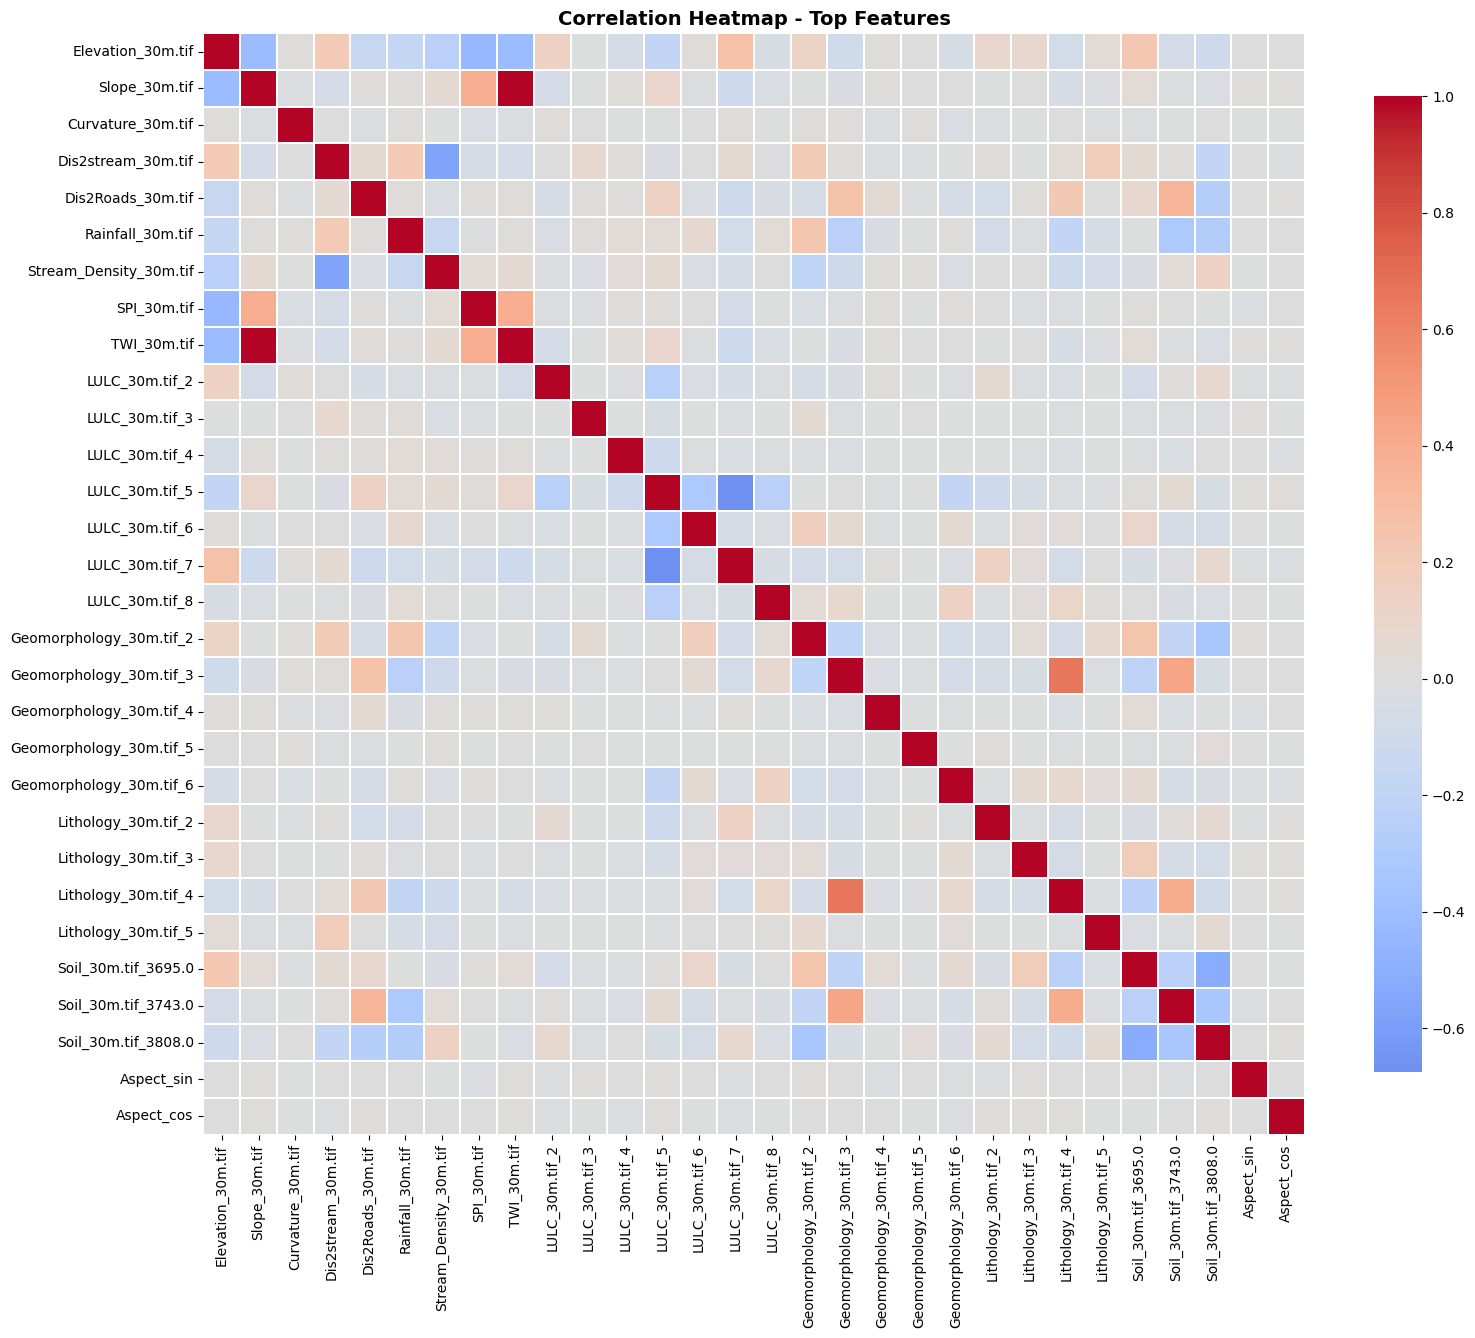

In [17]:
#Visuals
# Full correlation matrix (sample if too large)
if X_processed.shape[1] > 30:
    print(f"\nNote: Dataset has {X_processed.shape[1]} features.")
    print("Showing correlation for top 30 features most correlated with target...")
    
    top_features = corr_target_df.head(30).index
    X_subset = X_processed[top_features]
    corr_full = X_subset.corr()
else:
    corr_full = X_processed.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_full, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap_all_features.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: correlation_heatmap_all_features.png")

# Save correlation results
corr_target_df.to_csv('correlation_with_target.csv')
corr_matrix_continuous.to_csv('correlation_matrix_continuous.csv')

In [3]:
#COLLINEARITY ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_processed = pd.read_csv('data_processed_proper.csv')
y_clean = pd.read_csv('target_clean.csv')

print(f"\nDataset shape: {X_processed.shape}")
print(f"Number of features: {X_processed.shape[1]}")


Dataset shape: (14930, 30)
Number of features: 30


Found 1 highly correlated pairs:

  • Slope_30m.tif
    ↔ TWI_30m.tif
    Correlation: 1.0000

✓ Saved: high_correlation_pairs.csv


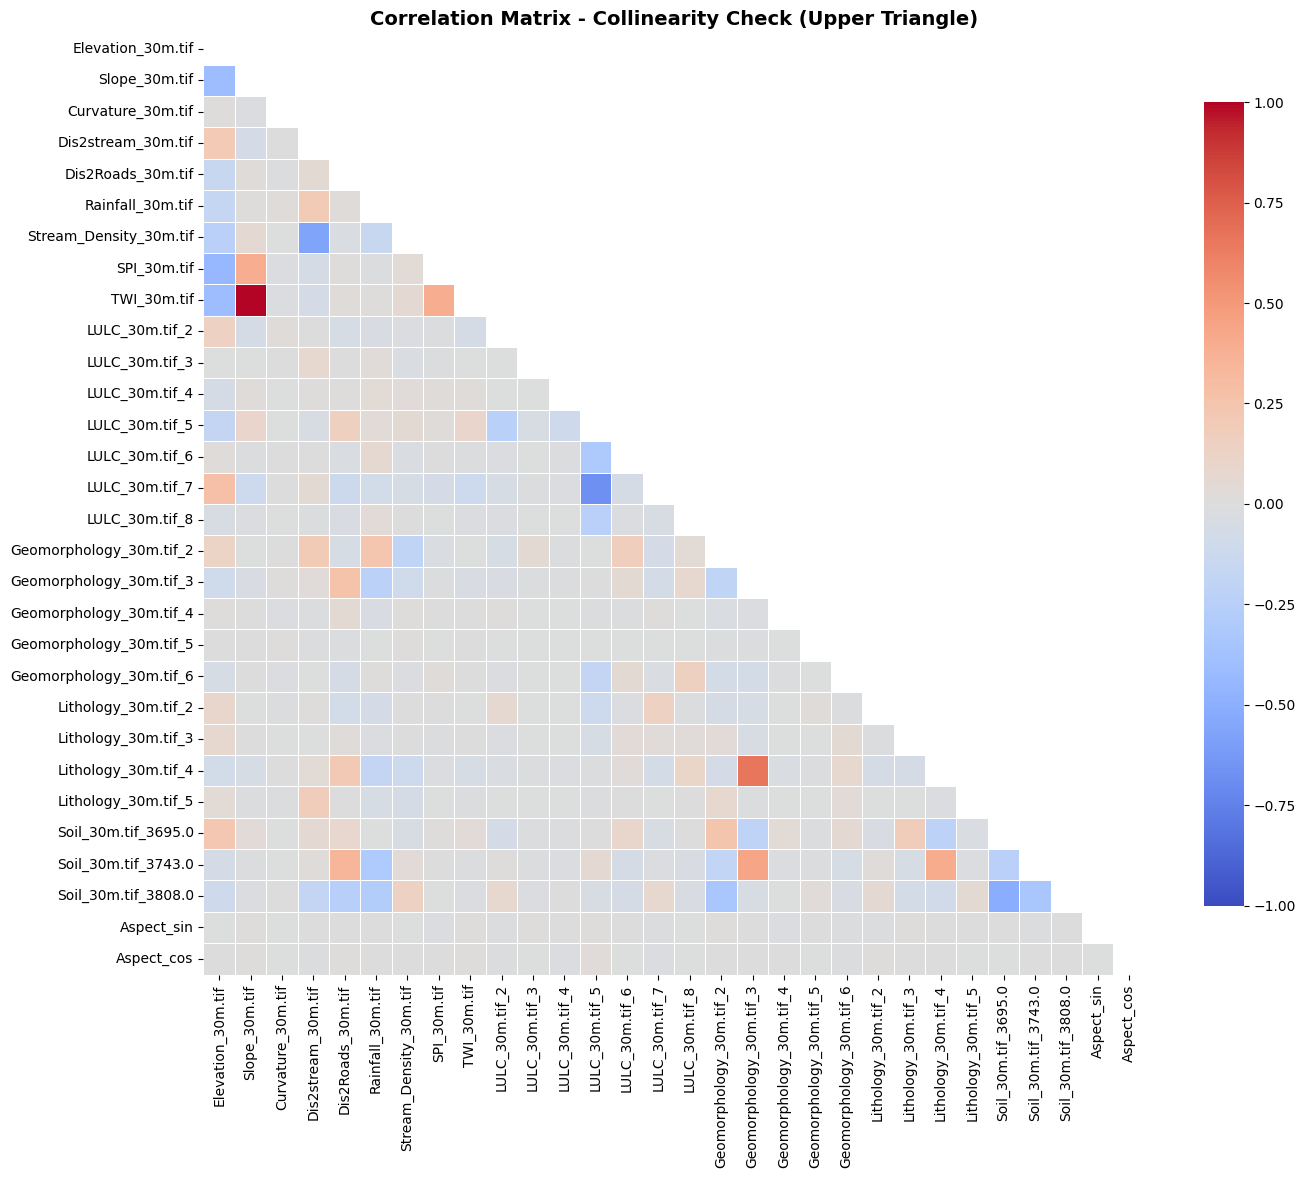

In [4]:
#MULTICOLLINEARITY - threshold > 0.8

corr_matrix = X_processed.corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append({
                'Feature_1': feature1,
                'Feature_2': feature2,
                'Correlation': corr_value,
                'Abs_Correlation': abs(corr_value)
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)

    print(f"Found {len(high_corr_df)} highly correlated pairs:\n")
    for idx, row in high_corr_df.iterrows():
        print(f"  • {row['Feature_1']}")
        print(f"    ↔ {row['Feature_2']}")
        print(f"    Correlation: {row['Correlation']:.4f}\n")
    
    # Save to CSV
    high_corr_df.to_csv('high_correlation_pairs.csv', index=False)
    print("✓ Saved: high_correlation_pairs.csv")
else:
    print("No highly correlated pairs found (|r| > 0.8)")
    high_corr_df = pd.DataFrame()

#visuals
# Visualize correlation matrix with threshold
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Collinearity Check (Upper Triangle)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('collinearity_correlation_matrix.png', dpi=300, bbox_inches='tight')

In [13]:
# QUICK PRE-CHECK
print("="*80)
print("PRE-VIF DIAGNOSTICS")
print("="*80)

# Check data
print(f"\n1. Shape: {X_processed.shape}")
print(f"   Samples > Features? {X_processed.shape[0] > X_processed.shape[1]} (should be True)")

# Check for NaN/Inf
print(f"\n2. NaN count: {X_processed.isnull().sum().sum()}")

# Check determinant of correlation matrix (if 0 = singular)
corr_matrix = X_processed.corr()
det = np.linalg.det(corr_matrix.values)
print(f"\n3. Correlation matrix determinant: {det:.10f}")
print(f"   Is singular (det ≈ 0)? {abs(det) < 1e-10}")

# Check for perfect correlations
perfect_corr_count = ((corr_matrix.abs() > 0.9999) & (corr_matrix != 1.0)).sum().sum() // 2
print(f"\n4. Perfect correlations (|r| > 0.9999): {perfect_corr_count}")

if det < 1e-10:
    print("\n⚠️ PROBLEM: Correlation matrix is singular!")
    print("   This means perfect multicollinearity exists")
    print("   VIF cannot be calculated")
    
    # Find which features
    print("\n   Finding problematic features...")
    eigenvalues = np.linalg.eigvals(corr_matrix.values)
    print(f"   Smallest eigenvalue: {eigenvalues.min():.10f}")
    print(f"   Number of near-zero eigenvalues: {(np.abs(eigenvalues) < 1e-10).sum()}")
    
    print(X_processed.dtypes)

    # Convert all boolean columns to integers 0/1
bool_cols = X_processed.select_dtypes(include=["bool"]).columns
X_processed[bool_cols] = X_processed[bool_cols].astype(int)

print(X_processed.dtypes)



PRE-VIF DIAGNOSTICS

1. Shape: (14930, 30)
   Samples > Features? True (should be True)

2. NaN count: 0

3. Correlation matrix determinant: 0.0000000000
   Is singular (det ≈ 0)? True

4. Perfect correlations (|r| > 0.9999): 0

⚠️ PROBLEM: Correlation matrix is singular!
   This means perfect multicollinearity exists
   VIF cannot be calculated

   Finding problematic features...
   Smallest eigenvalue: 0.0000000000
   Number of near-zero eigenvalues: 1
Elevation_30m.tif          float64
Slope_30m.tif              float64
Curvature_30m.tif          float64
Dis2stream_30m.tif         float64
Dis2Roads_30m.tif          float64
Rainfall_30m.tif           float64
Stream_Density_30m.tif     float64
SPI_30m.tif                float64
TWI_30m.tif                float64
LULC_30m.tif_2               int64
LULC_30m.tif_3               int64
LULC_30m.tif_4               int64
LULC_30m.tif_5               int64
LULC_30m.tif_6               int64
LULC_30m.tif_7               int64
LULC_30m.tif_8  

  Processed 10/30 features...
  Processed 20/30 features...
  Processed 30/30 features...
Severe multicollinearity (VIF > 10): 2 features

Features with SEVERE multicollinearity:
      Feature  VIF
Slope_30m.tif  inf
  TWI_30m.tif  inf

High multicollinearity (5 < VIF ≤ 10): 2 features

Features with HIGH multicollinearity:
            Feature      VIF
     LULC_30m.tif_5 7.042082
Soil_30m.tif_3808.0 5.135002

Moderate multicollinearity (1 < VIF ≤ 5): 26 features
Low/No multicollinearity (VIF ≤ 1): 0 features

✓ Saved: vif_analysis.csv

✓ Saved: vif_multicollinearity.png
Samples: 14930
Features: 30
                    Feature       VIF
1             Slope_30m.tif       inf
8               TWI_30m.tif       inf
12           LULC_30m.tif_5  7.042082
27      Soil_30m.tif_3808.0  5.135002
26      Soil_30m.tif_3743.0  3.189857
25      Soil_30m.tif_3695.0  2.997257
17  Geomorphology_30m.tif_3  2.484046
23      Lithology_30m.tif_4  2.376658
0         Elevation_30m.tif  2.078818
5          Rai

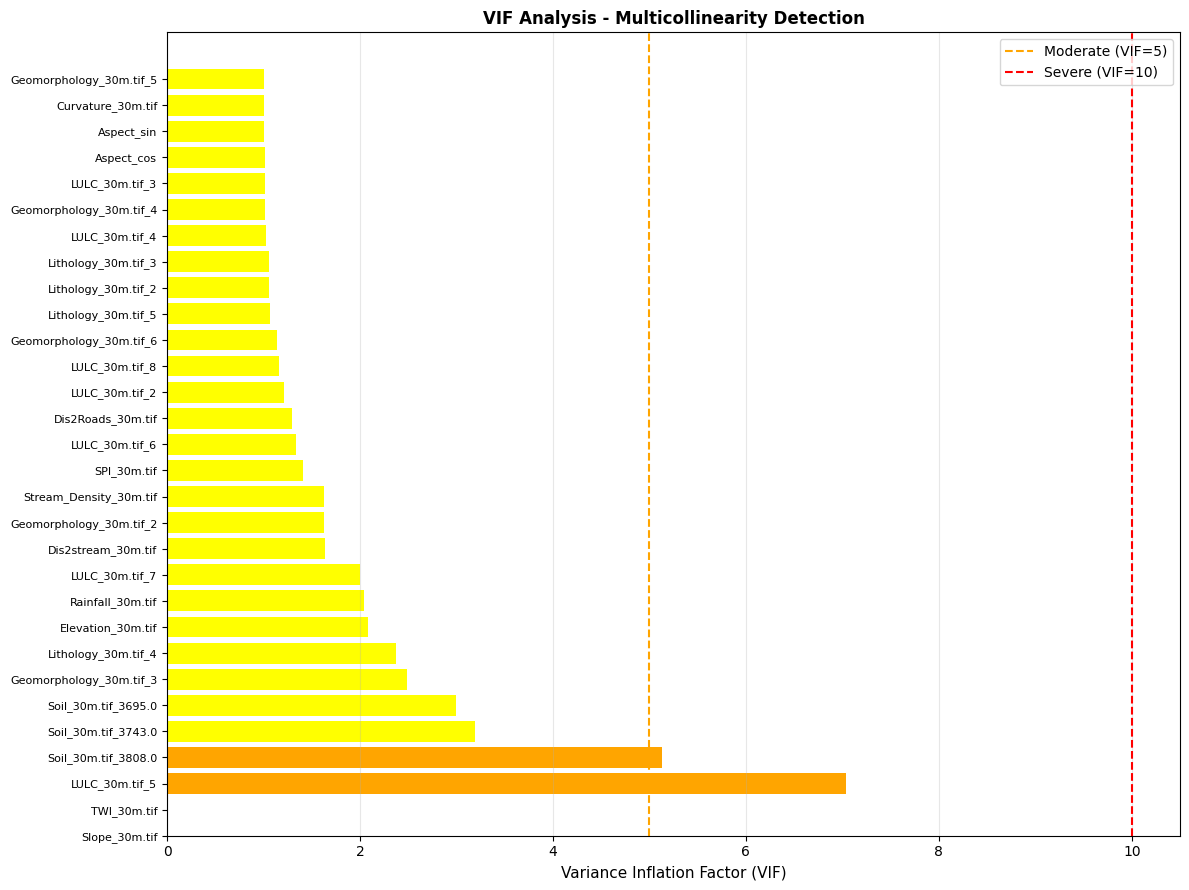

In [ ]:
#VARIANCE INFLATION FACTOR (VIF)
# VIF interpretation:
# VIF = 1: No correlation
# 1 < VIF < 5: Moderate correlation
# 5 < VIF < 10: High correlation (concerning)
# VIF > 10: Severe multicollinearity (problematic)

vif_data = []

# Calculate VIF for each feature
for i, col in enumerate(X_processed.columns):
    try:
        vif = variance_inflation_factor(X_processed.values, i)
        vif_data.append({
            'Feature': col,
            'VIF': vif
        })
        
        # Print progress every 10 features
        if (i + 1) % 10 == 0:
            print(f"  Processed {i + 1}/{len(X_processed.columns)} features...")
    except:
        vif_data.append({
            'Feature': col,
            'VIF': np.nan
        })

vif_df = pd.DataFrame(vif_data)
vif_df = vif_df.sort_values('VIF', ascending=False)

# Categorize by VIF
severe_mc = vif_df[vif_df['VIF'] > 10]
high_mc = vif_df[(vif_df['VIF'] > 5) & (vif_df['VIF'] <= 10)]
moderate_mc = vif_df[(vif_df['VIF'] > 1) & (vif_df['VIF'] <= 5)]
no_mc = vif_df[vif_df['VIF'] <= 1]

print(f"Severe multicollinearity (VIF > 10): {len(severe_mc)} features")
if len(severe_mc) > 0:
    print("\nFeatures with SEVERE multicollinearity:")
    print(severe_mc.to_string(index=False))

print(f"\nHigh multicollinearity (5 < VIF ≤ 10): {len(high_mc)} features")
if len(high_mc) > 0:
    print("\nFeatures with HIGH multicollinearity:")
    print(high_mc.to_string(index=False))

print(f"\nModerate multicollinearity (1 < VIF ≤ 5): {len(moderate_mc)} features")
print(f"Low/No multicollinearity (VIF ≤ 1): {len(no_mc)} features")

# Save VIF results
vif_df.to_csv('vif_analysis.csv', index=False)
print("\n✓ Saved: vif_analysis.csv")

# Visualize VIF
plt.figure(figsize=(12, max(8, len(vif_df) * 0.3)))

# Color code by severity
colors = []
for vif in vif_df['VIF']:
    if vif > 10:
        colors.append('red')
    elif vif > 5:
        colors.append('orange')
    elif vif > 1:
        colors.append('yellow')
    else:
        colors.append('green')

plt.barh(range(len(vif_df)), vif_df['VIF'], color=colors)
plt.yticks(range(len(vif_df)), vif_df['Feature'], fontsize=8)
plt.xlabel('Variance Inflation Factor (VIF)', fontsize=11)
plt.title('VIF Analysis - Multicollinearity Detection', fontsize=12, fontweight='bold')
plt.axvline(x=5, color='orange', linestyle='--', linewidth=1.5, label='Moderate (VIF=5)')
plt.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='Severe (VIF=10)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('vif_multicollinearity.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: vif_multicollinearity.png")

print(f"Samples: {X_processed.shape[0]}")
print(f"Features: {X_processed.shape[1]}")
print(vif_df)


✓ Saved: correlation_problem_features.png


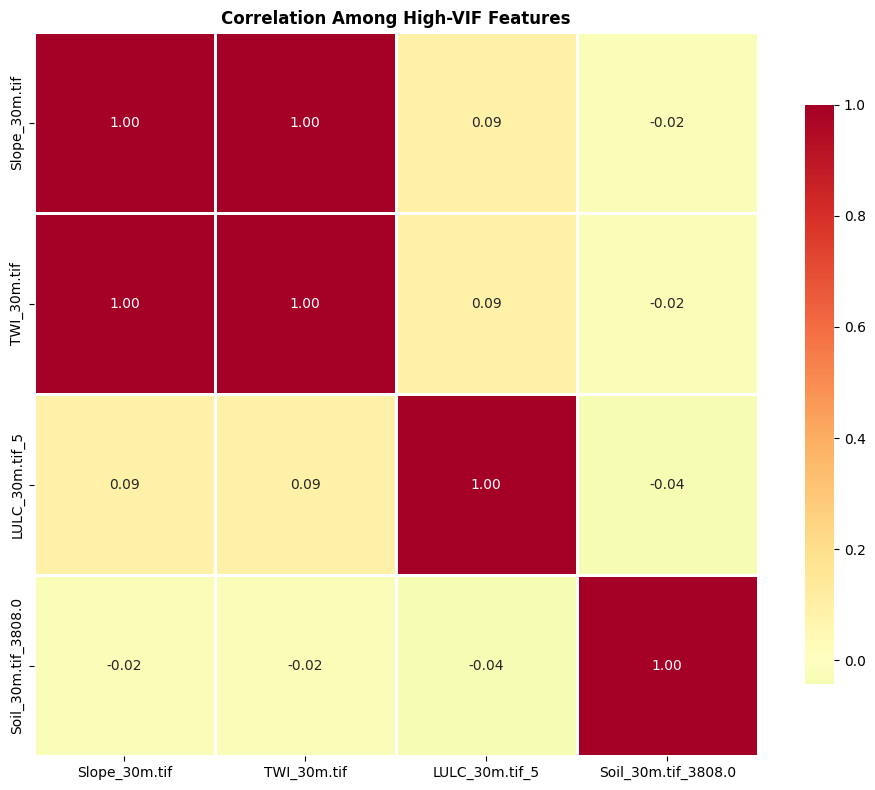

In [ ]:
#CORRELATION HEATMAP 
if len(severe_mc) > 0 or len(high_mc) > 0:
    
    problem_features = pd.concat([severe_mc, high_mc])['Feature'].tolist()
    
    if len(problem_features) > 1:
        corr_problem = X_processed[problem_features].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_problem, 
                    annot=True, 
                    fmt='.2f',
                    cmap='RdYlGn_r',
                    center=0,
                    square=True,
                    linewidths=1,
                    cbar_kws={"shrink": 0.8})
        plt.title('Correlation Among High-VIF Features', 
                  fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.savefig('correlation_problem_features.png', dpi=300, bbox_inches='tight')
        print("\n✓ Saved: correlation_problem_features.png")

        #COLLINEARITY ANALYSIS COMPLETED



Dataset shape: (14930, 30)
Number of features: 30
Class distribution: [7646 7284]

--- Top 20 Features by Mutual Information ---

                Feature  MI_Score
       Rainfall_30m.tif  0.097063
Geomorphology_30m.tif_2  0.057559
         LULC_30m.tif_7  0.042721
    Soil_30m.tif_3808.0  0.037457
      Elevation_30m.tif  0.035862
     Dis2stream_30m.tif  0.020355
    Soil_30m.tif_3695.0  0.014734
      Dis2Roads_30m.tif  0.014150
            TWI_30m.tif  0.013925
          Slope_30m.tif  0.013055
         LULC_30m.tif_8  0.012263
Geomorphology_30m.tif_6  0.012153
Geomorphology_30m.tif_3  0.009987
    Soil_30m.tif_3743.0  0.009410
 Stream_Density_30m.tif  0.008362
         LULC_30m.tif_2  0.008080
         LULC_30m.tif_6  0.006912
    Lithology_30m.tif_3  0.006464
            SPI_30m.tif  0.006210
    Lithology_30m.tif_2  0.005047

✓ Saved: mutual_information_scores.csv
✓ Saved: mutual_information_top20.png


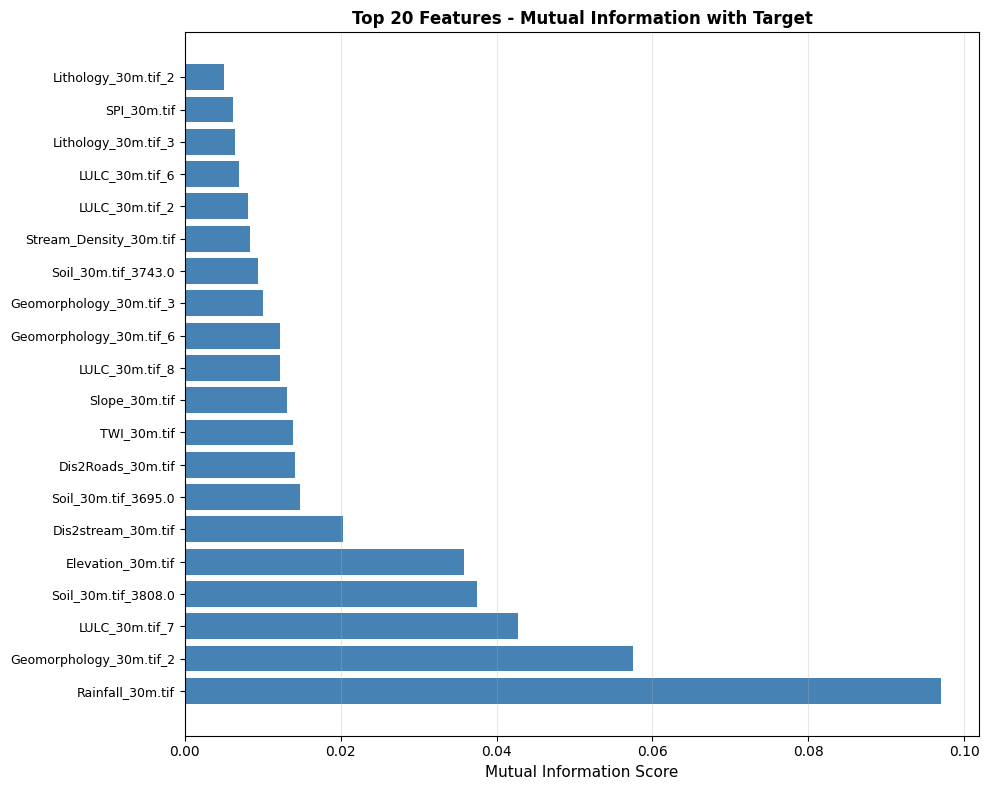

In [17]:
#FEATURE SELECTION 'n' BEST PREDICTORS FOR CLASSES 0/1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_processed = pd.read_csv('data_processed_proper.csv')
y_clean = pd.read_csv('target_clean.csv').values.ravel()

print(f"\nDataset shape: {X_processed.shape}")
print(f"Number of features: {X_processed.shape[1]}")
print(f"Class distribution: {np.bincount(y_clean)}")

# MUTUAL INFORMATION ANALYSIS - best features for prediction
mi_scores = mutual_info_classif(X_processed, y_clean, random_state=42)

# Create DataFrame
mi_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\n--- Top 20 Features by Mutual Information ---\n")
print(mi_df.head(20).to_string(index=False))

# Save results
mi_df.to_csv('mutual_information_scores.csv', index=False)
print("\n✓ Saved: mutual_information_scores.csv")

# Visualize top 20
plt.figure(figsize=(10, 8))
top_20_mi = mi_df.head(20)
plt.barh(range(len(top_20_mi)), top_20_mi['MI_Score'], color='steelblue')
plt.yticks(range(len(top_20_mi)), top_20_mi['Feature'], fontsize=9)
plt.xlabel('Mutual Information Score', fontsize=11)
plt.title('Top 20 Features - Mutual Information with Target', 
          fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_top20.png', dpi=300, bbox_inches='tight')
print("✓ Saved: mutual_information_top20.png")



--- Top 20 Features by Random Forest Importance ---

                Feature  RF_Importance
       Rainfall_30m.tif       0.212568
Geomorphology_30m.tif_2       0.106879
      Elevation_30m.tif       0.088414
         LULC_30m.tif_7       0.077926
    Soil_30m.tif_3808.0       0.071167
      Dis2Roads_30m.tif       0.057376
    Soil_30m.tif_3695.0       0.048167
     Dis2stream_30m.tif       0.045600
 Stream_Density_30m.tif       0.045068
    Soil_30m.tif_3743.0       0.036664
Geomorphology_30m.tif_3       0.035843
    Lithology_30m.tif_4       0.023936
            TWI_30m.tif       0.019573
            SPI_30m.tif       0.019161
          Slope_30m.tif       0.018044
Geomorphology_30m.tif_6       0.016939
         LULC_30m.tif_5       0.015181
             Aspect_sin       0.015121
             Aspect_cos       0.013788
      Curvature_30m.tif       0.010752

Random Forest Performance:
  Training Accuracy: 0.8853
  Testing Accuracy: 0.8350
✓ Saved: random_forest_importance_top20.png


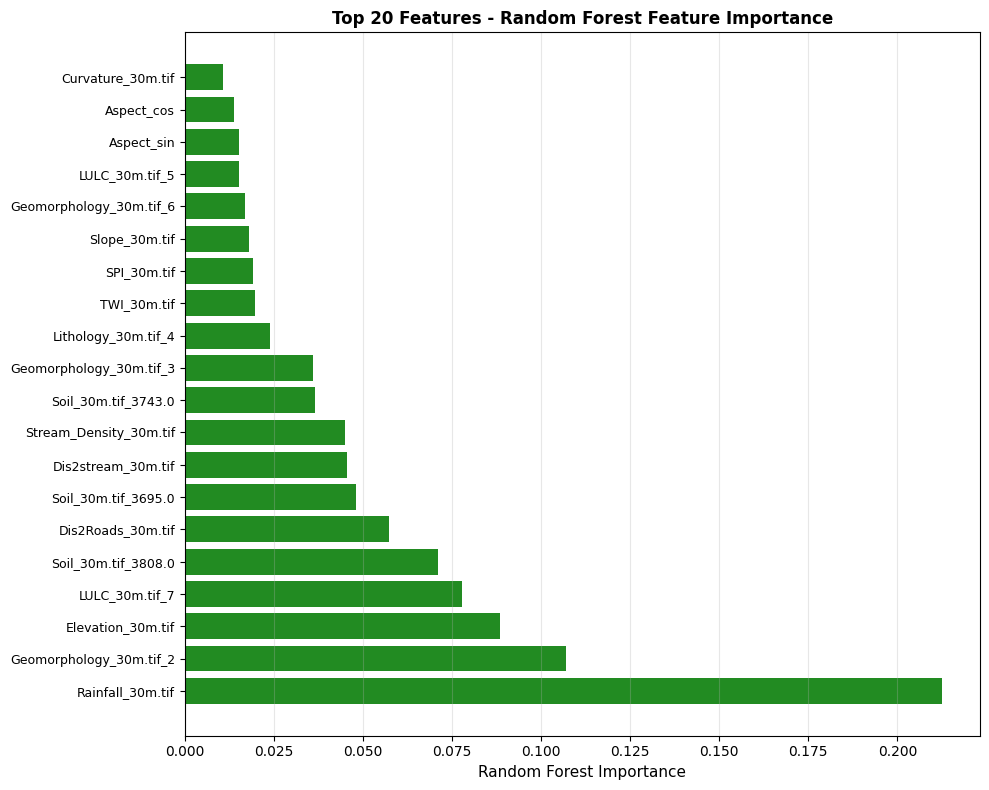

In [30]:
#RANDOM FOREST - ML!!!
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_clean, test_size=0.3, random_state=42, stratify=y_clean
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_

rf_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'RF_Importance': rf_importances
}).sort_values('RF_Importance', ascending=False)

print("\n--- Top 20 Features by Random Forest Importance ---\n")
print(rf_df.head(20).to_string(index=False))

# Model performance
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"\nRandom Forest Performance:")
print(f"  Training Accuracy: {train_score:.4f}")
print(f"  Testing Accuracy: {test_score:.4f}")

# Save results
rf_df.to_csv('random_forest_importance.csv', index=False)

# Visualize top 20
plt.figure(figsize=(10, 8))
top_20_rf = rf_df.head(20)
plt.barh(range(len(top_20_rf)), top_20_rf['RF_Importance'], color='forestgreen')
plt.yticks(range(len(top_20_rf)), top_20_rf['Feature'], fontsize=9)
plt.xlabel('Random Forest Importance', fontsize=11)
plt.title('Top 20 Features - Random Forest Feature Importance', 
          fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('random_forest_importance_top20.png', dpi=300, bbox_inches='tight')
print("✓ Saved: random_forest_importance_top20.png")



--- Top 20 Features by Permutation Importance ---

                Feature  Perm_Importance_Mean  Perm_Importance_Std
       Rainfall_30m.tif              0.110315             0.003919
Geomorphology_30m.tif_2              0.050837             0.002104
      Elevation_30m.tif              0.042242             0.004289
         LULC_30m.tif_7              0.033266             0.002137
Geomorphology_30m.tif_3              0.030833             0.001123
    Soil_30m.tif_3695.0              0.014490             0.002234
    Soil_30m.tif_3743.0              0.012436             0.001117
    Lithology_30m.tif_4              0.010025             0.001861
 Stream_Density_30m.tif              0.009824             0.002201
      Dis2Roads_30m.tif              0.009466             0.001108
Geomorphology_30m.tif_6              0.006676             0.001149
     Dis2stream_30m.tif              0.006475             0.001576
    Soil_30m.tif_3808.0              0.006430             0.003064
         L

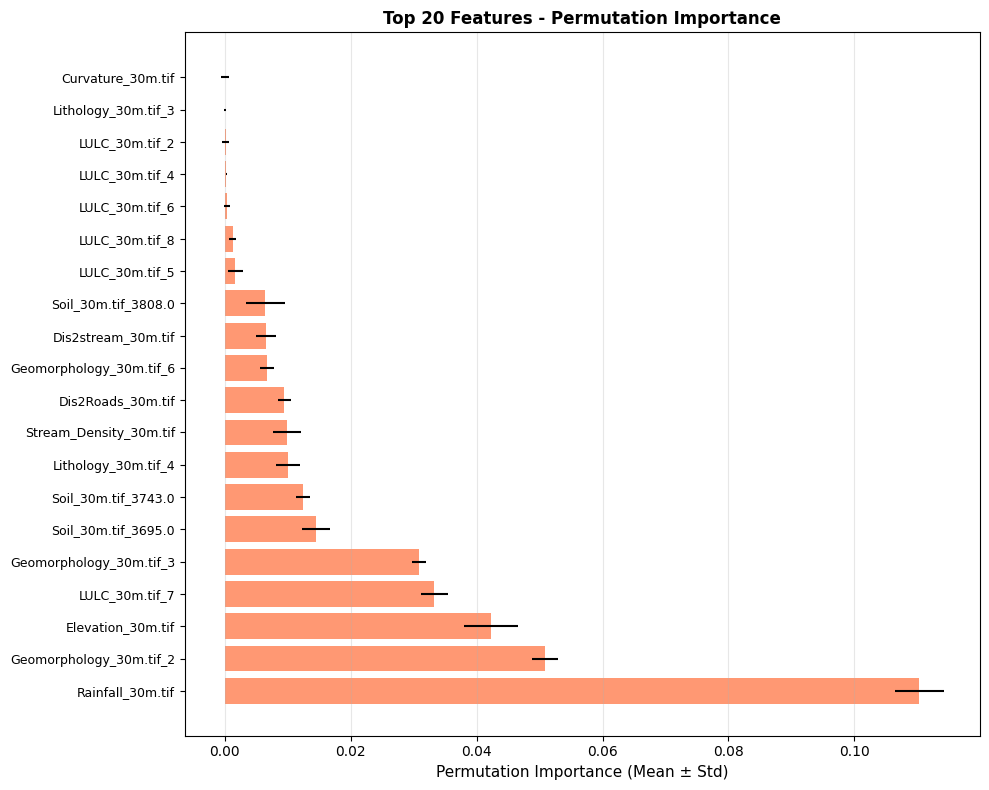

In [31]:
#PERMUTATION IMPORTANCE ANALYSIS - using RF alg and adding random features to check importance

perm_importance = permutation_importance(
    rf_model, X_test, y_test, 
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'Perm_Importance_Mean': perm_importance.importances_mean,
    'Perm_Importance_Std': perm_importance.importances_std
}).sort_values('Perm_Importance_Mean', ascending=False)

print("\n--- Top 20 Features by Permutation Importance ---\n")
print(perm_df.head(20).to_string(index=False))

# Save results
perm_df.to_csv('permutation_importance.csv', index=False)

# Visualize top 20 with error bars
plt.figure(figsize=(10, 8))
top_20_perm = perm_df.head(20)
plt.barh(range(len(top_20_perm)), 
         top_20_perm['Perm_Importance_Mean'], 
         xerr=top_20_perm['Perm_Importance_Std'],
         color='coral',
         alpha=0.8)
plt.yticks(range(len(top_20_perm)), top_20_perm['Feature'], fontsize=9)
plt.xlabel('Permutation Importance (Mean ± Std)', fontsize=11)
plt.title('Top 20 Features - Permutation Importance', 
          fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('permutation_importance_top20.png', dpi=300, bbox_inches='tight')
print("✓ Saved: permutation_importance_top20.png")



--- Top 20 Features by ANOVA F-Score ---

                Feature     F_Score       P_Value
Geomorphology_30m.tif_2 1799.185029  0.000000e+00
       Rainfall_30m.tif 1466.449408 3.888729e-306
    Soil_30m.tif_3808.0 1338.134729 1.198501e-280
         LULC_30m.tif_7 1329.425290 6.547132e-279
      Elevation_30m.tif  951.282659 1.486596e-202
    Soil_30m.tif_3695.0  491.852706 3.016577e-107
    Soil_30m.tif_3743.0  381.625143  6.139747e-84
      Dis2Roads_30m.tif  261.423432  2.626294e-58
Geomorphology_30m.tif_6  247.354407  2.722219e-55
         LULC_30m.tif_8  241.614316  4.637230e-54
         LULC_30m.tif_6  217.795936  6.053107e-49
         LULC_30m.tif_2  187.483591  2.031713e-42
    Lithology_30m.tif_2  158.247108  4.166661e-36
    Lithology_30m.tif_4  152.077397  8.998719e-35
          Slope_30m.tif  104.042083  2.380530e-24
            TWI_30m.tif  104.042083  2.380530e-24
Geomorphology_30m.tif_3  102.759239  4.528446e-24
         LULC_30m.tif_5  101.880475  7.035399e-24
       

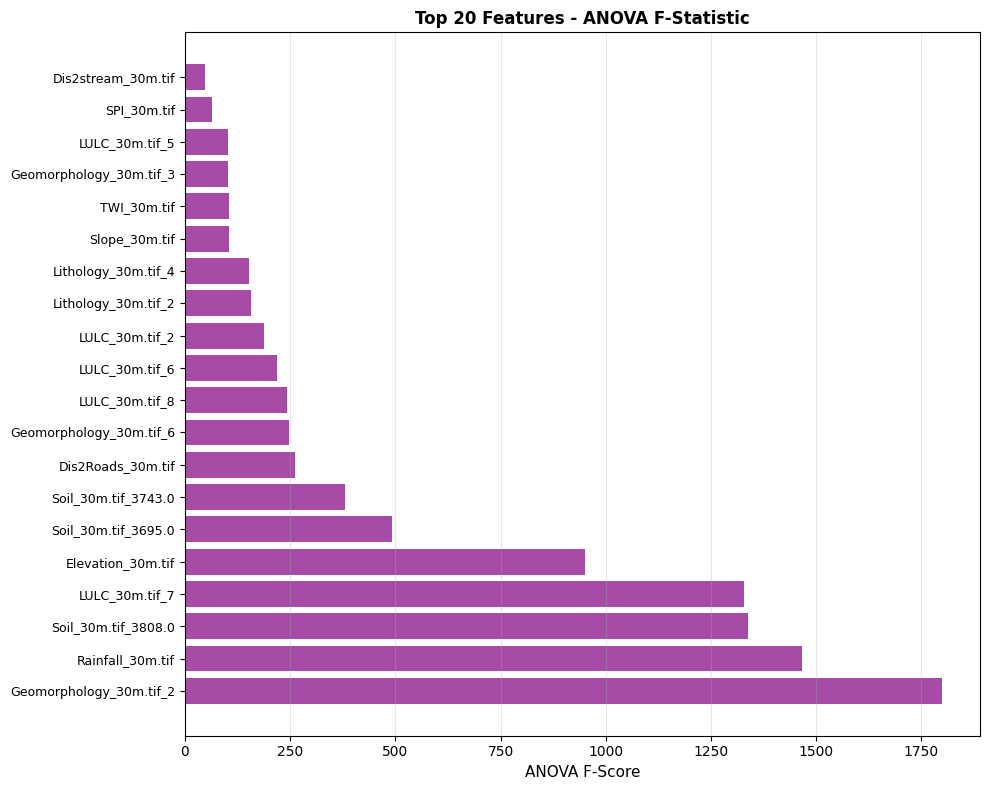

In [ ]:
#ANOVA F-STATISTIC ANALYSIS

# Calculate F-scores
f_scores, p_values = f_classif(X_processed, y_clean)

anova_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'F_Score': f_scores,
    'P_Value': p_values
}).sort_values('F_Score', ascending=False)

print("\n--- Top 20 Features by ANOVA F-Score ---\n")
print(anova_df.head(20).to_string(index=False))

# Save results
anova_df.to_csv('anova_f_scores.csv', index=False)

# Visualize top 20
plt.figure(figsize=(10, 8))
top_20_anova = anova_df.head(20)
plt.barh(range(len(top_20_anova)), top_20_anova['F_Score'], color='purple', alpha=0.7)
plt.yticks(range(len(top_20_anova)), top_20_anova['Feature'], fontsize=9)
plt.xlabel('ANOVA F-Score', fontsize=11)
plt.title('Top 20 Features - ANOVA F-Statistic', 
          fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('anova_f_scores_top20.png', dpi=300, bbox_inches='tight')
print("✓ Saved: anova_f_scores_top20.png")



--- TOP 25 BEST PREDICTORS (Combined Ranking) ---

                Feature  Combined_Score
      Elevation_30m.tif        1.000000
          Slope_30m.tif        0.595620
      Curvature_30m.tif        0.498767
     Dis2stream_30m.tif        0.451731
      Dis2Roads_30m.tif        0.381724
       Rainfall_30m.tif        0.225430
 Stream_Density_30m.tif        0.180244
            SPI_30m.tif        0.153660
            TWI_30m.tif        0.150057
         LULC_30m.tif_2        0.136338
         LULC_30m.tif_3        0.123825
         LULC_30m.tif_4        0.104880
         LULC_30m.tif_5        0.090008
         LULC_30m.tif_6        0.076571
         LULC_30m.tif_7        0.064989
         LULC_30m.tif_8        0.060830
Geomorphology_30m.tif_2        0.055380
Geomorphology_30m.tif_3        0.053833
Geomorphology_30m.tif_4        0.046358
Geomorphology_30m.tif_5        0.037197
Geomorphology_30m.tif_6        0.029901
    Lithology_30m.tif_2        0.019620
    Lithology_30m.tif_3     

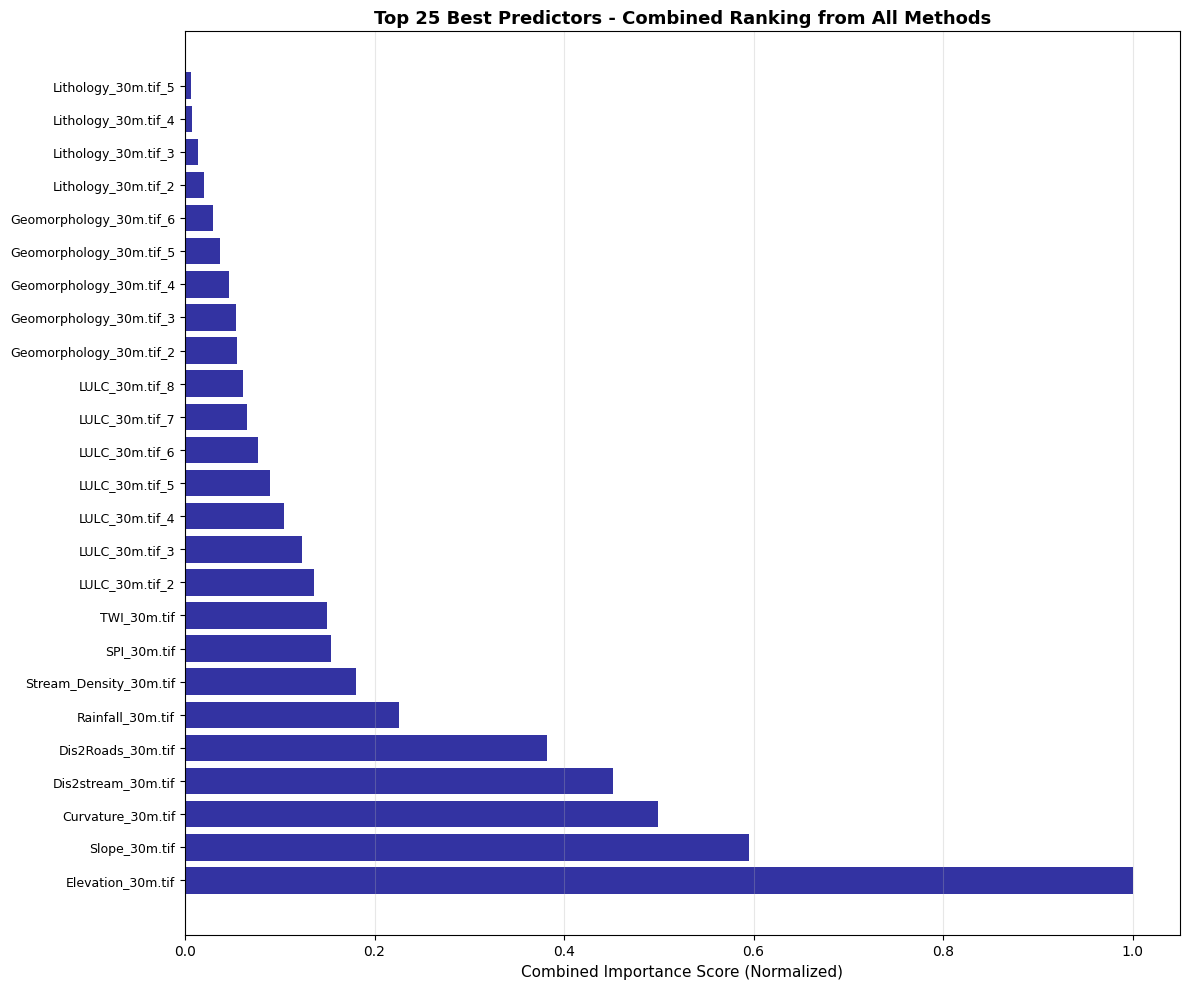

In [ ]:
# 5. COMBINED RANKING - FIXED VERSION (Merges by Feature Name)

from sklearn.preprocessing import MinMaxScaler

print("\n" + "="*80)
print("COMBINED FEATURE RANKING")
print("="*80)

# Start with all features
combined_df = pd.DataFrame({'Feature': X_processed.columns})

scaler = MinMaxScaler()

# Normalize MI scores and merge
mi_temp = mi_df[['Feature', 'MI_Score']].copy()
mi_temp['MI_Score_Norm'] = scaler.fit_transform(mi_temp[['MI_Score']])
combined_df = combined_df.merge(mi_temp[['Feature', 'MI_Score_Norm']], on='Feature', how='left')

# Normalize RF scores and merge
rf_temp = rf_df[['Feature', 'RF_Importance']].copy()
rf_temp['RF_Importance_Norm'] = scaler.fit_transform(rf_temp[['RF_Importance']])
combined_df = combined_df.merge(rf_temp[['Feature', 'RF_Importance_Norm']], on='Feature', how='left')

# Normalize Permutation scores and merge
perm_temp = perm_df[['Feature', 'Perm_Importance_Mean']].copy()
perm_temp['Perm_Importance_Norm'] = scaler.fit_transform(perm_temp[['Perm_Importance_Mean']])
combined_df = combined_df.merge(perm_temp[['Feature', 'Perm_Importance_Norm']], on='Feature', how='left')

# Normalize ANOVA scores and merge
anova_temp = anova_df[['Feature', 'F_Score']].copy()
anova_temp['ANOVA_Score_Norm'] = scaler.fit_transform(anova_temp[['F_Score']])
combined_df = combined_df.merge(anova_temp[['Feature', 'ANOVA_Score_Norm']], on='Feature', how='left')

# Calculate combined score (average of all 4 methods)
combined_df['Combined_Score'] = combined_df[
    ['MI_Score_Norm', 'RF_Importance_Norm', 'Perm_Importance_Norm', 'ANOVA_Score_Norm']
].mean(axis=1)

# Sort by combined score
combined_df = combined_df.sort_values('Combined_Score', ascending=False)

print("\n--- TOP 25 BEST PREDICTORS (Combined Ranking) ---\n")
print(combined_df.head(25)[['Feature', 'Combined_Score']].to_string(index=False))

# Show breakdown for top 5
print("\n--- DETAILED BREAKDOWN (Top 5) ---\n")
top_5_detail = combined_df.head(5)[['Feature', 'MI_Score_Norm', 'RF_Importance_Norm', 
                                     'Perm_Importance_Norm', 'ANOVA_Score_Norm', 'Combined_Score']]
print(top_5_detail.to_string(index=False))

# Save results
combined_df.to_csv('combined_feature_ranking.csv', index=False)
print("\n✓ Saved: combined_feature_ranking.csv")

# Visualize top 25
plt.figure(figsize=(12, 10))
top_25_combined = combined_df.head(25)
plt.barh(range(len(top_25_combined)), 
         top_25_combined['Combined_Score'], 
         color='darkblue',
         alpha=0.8)
plt.yticks(range(len(top_25_combined)), top_25_combined['Feature'], fontsize=9)
plt.xlabel('Combined Importance Score (Normalized)', fontsize=11)
plt.title('Top 25 Best Predictors - Combined Ranking from All Methods', 
          fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('combined_feature_ranking_top25.png', dpi=300, bbox_inches='tight')
print("✓ Saved: combined_feature_ranking_top25.png")

print("\n" + "="*80)
print("COMBINED RANKING COMPLETE!")
print("="*80)


--- Features Appearing in Multiple Top-10 Rankings ---

(Consensus Count: How many methods ranked this in top 10)

                Feature  Consensus_Count
       Rainfall_30m.tif                4
Geomorphology_30m.tif_2                4
      Elevation_30m.tif                4
         LULC_30m.tif_7                4
    Soil_30m.tif_3695.0                4
      Dis2Roads_30m.tif                4
    Soil_30m.tif_3808.0                3
    Soil_30m.tif_3743.0                3
     Dis2stream_30m.tif                2
 Stream_Density_30m.tif                2
         LULC_30m.tif_8                1
Geomorphology_30m.tif_3                1
    Lithology_30m.tif_4                1
          Slope_30m.tif                1
            TWI_30m.tif                1
Geomorphology_30m.tif_6                1

✓ Saved: feature_consensus_comparison.png


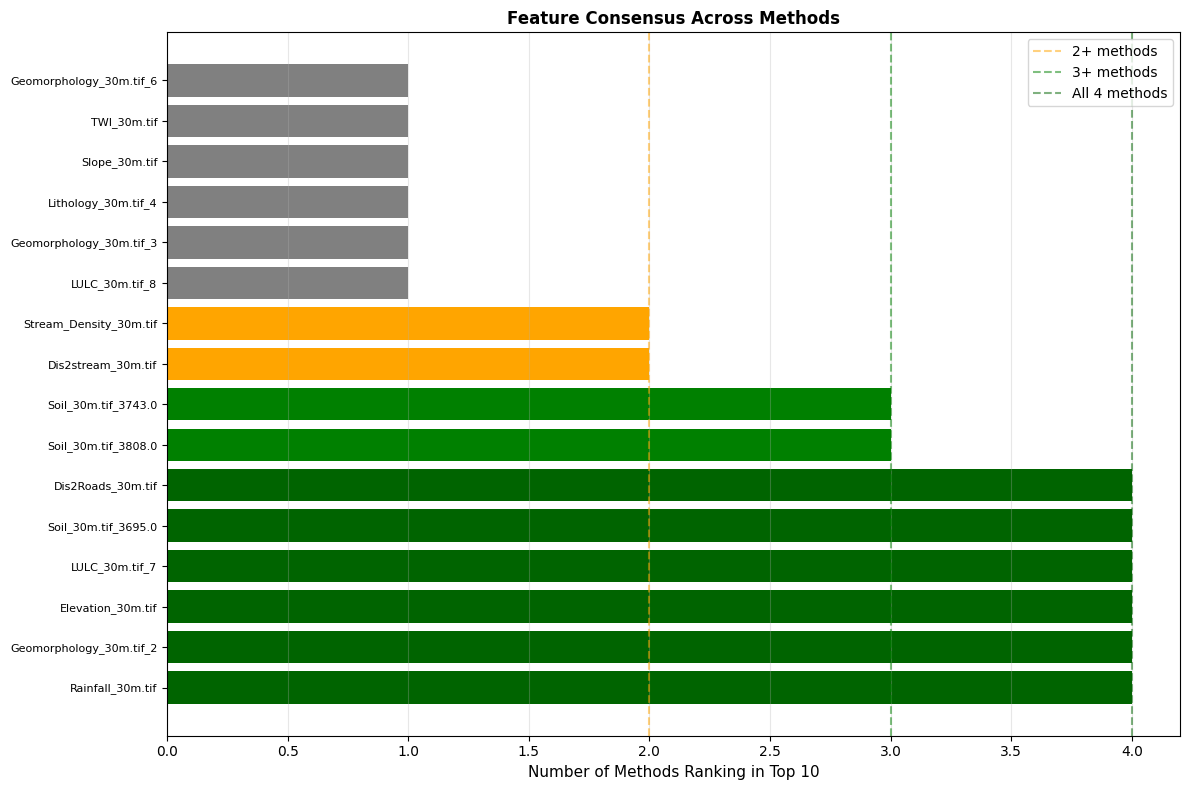

In [ ]:
# 6. COMPARISON OF ALL METHODS

# Get top 10 from each method
top_10_mi = set(mi_df.head(10)['Feature'])
top_10_rf = set(rf_df.head(10)['Feature'])
top_10_perm = set(perm_df.head(10)['Feature'])
top_10_anova = set(anova_df.head(10)['Feature'])

# Find consensus features (appear in multiple methods)
all_top_features = top_10_mi | top_10_rf | top_10_perm | top_10_anova

consensus_count = {}
for feature in all_top_features:
    count = 0
    if feature in top_10_mi:
        count += 1
    if feature in top_10_rf:
        count += 1
    if feature in top_10_perm:
        count += 1
    if feature in top_10_anova:
        count += 1
    consensus_count[feature] = count

consensus_df = pd.DataFrame(list(consensus_count.items()), 
                            columns=['Feature', 'Consensus_Count'])
consensus_df = consensus_df.sort_values('Consensus_Count', ascending=False)

print("\n--- Features Appearing in Multiple Top-10 Rankings ---\n")
print("(Consensus Count: How many methods ranked this in top 10)\n")
print(consensus_df.head(20).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
plt.barh(range(len(consensus_df)), 
         consensus_df['Consensus_Count'], 
         color=['darkgreen' if x == 4 else 'green' if x == 3 else 'orange' if x == 2 else 'gray' 
                for x in consensus_df['Consensus_Count']])
plt.yticks(range(len(consensus_df)), consensus_df['Feature'], fontsize=8)
plt.xlabel('Number of Methods Ranking in Top 10', fontsize=11)
plt.title('Feature Consensus Across Methods', fontsize=12, fontweight='bold')
plt.axvline(x=2, color='orange', linestyle='--', alpha=0.5, label='2+ methods')
plt.axvline(x=3, color='green', linestyle='--', alpha=0.5, label='3+ methods')
plt.axvline(x=4, color='darkgreen', linestyle='--', alpha=0.5, label='All 4 methods')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_consensus_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: feature_consensus_comparison.png")

In [ ]:
# 7. RECOMMENDED FEATURE SETS

print("7. RECOMMENDED FEATURE SETS FOR MODELING")

# Option 1: Top features by combined score
top_10_features = combined_df.head(10)['Feature'].tolist()
top_15_features = combined_df.head(15)['Feature'].tolist()
top_20_features = combined_df.head(20)['Feature'].tolist()

# Option 2: Consensus features (appear in 3+ methods)
consensus_features = consensus_df[consensus_df['Consensus_Count'] >= 3]['Feature'].tolist()

print("\n--- Recommended Feature Sets ---\n")

print(f"1. MINIMAL SET (Top 10 by Combined Score):")
print(f"   Features: {len(top_10_features)}")
for i, feat in enumerate(top_10_features, 1):
    print(f"   {i}. {feat}")

print(f"\n2. BALANCED SET (Top 15 by Combined Score):")
print(f"   Features: {len(top_15_features)}")

print(f"\n3. COMPREHENSIVE SET (Top 20 by Combined Score):")
print(f"   Features: {len(top_20_features)}")

print(f"\n4. CONSENSUS SET (3+ methods agree):")
print(f"   Features: {len(consensus_features)}")
if len(consensus_features) > 0:
    for i, feat in enumerate(consensus_features, 1):
        print(f"   {i}. {feat}")

# Save recommended sets
X_top10 = X_processed[top_10_features]
X_top15 = X_processed[top_15_features]
X_top20 = X_processed[top_20_features]

X_top10.to_csv('data_top10_features.csv', index=False)
X_top15.to_csv('data_top15_features.csv', index=False)
X_top20.to_csv('data_top20_features.csv', index=False)

if len(consensus_features) > 0:
    X_consensus = X_processed[consensus_features]
    X_consensus.to_csv('data_consensus_features.csv', index=False)
print("\n✓ Saved reduced feature sets")


7. RECOMMENDED FEATURE SETS FOR MODELING

--- Recommended Feature Sets ---

1. MINIMAL SET (Top 10 by Combined Score):
   Features: 10
   1. Elevation_30m.tif
   2. Slope_30m.tif
   3. Curvature_30m.tif
   4. Dis2stream_30m.tif
   5. Dis2Roads_30m.tif
   6. Rainfall_30m.tif
   7. Stream_Density_30m.tif
   8. SPI_30m.tif
   9. TWI_30m.tif
   10. LULC_30m.tif_2

2. BALANCED SET (Top 15 by Combined Score):
   Features: 15

3. COMPREHENSIVE SET (Top 20 by Combined Score):
   Features: 20

4. CONSENSUS SET (3+ methods agree):
   Features: 8
   1. Rainfall_30m.tif
   2. Geomorphology_30m.tif_2
   3. Elevation_30m.tif
   4. LULC_30m.tif_7
   5. Soil_30m.tif_3695.0
   6. Dis2Roads_30m.tif
   7. Soil_30m.tif_3808.0
   8. Soil_30m.tif_3743.0

✓ Saved reduced feature sets
